In [51]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan


In [3]:
path='yelp_academic_dataset_business.json'
business = [json.loads(line) for line in open(path)]

In [4]:
restaurants = [rec for rec in business if rec['categories'] and 'Restaurants' in rec['categories']]

In [5]:
# rawData = pd.DataFrame()
# rawData["stars"] = [restaurant.get("stars") for restaurant in restaurants]
# rawData["attributes"] = [restaurant.get("attributes") for restaurant in restaurants]

In [6]:
dataset = []
for restaurant in restaurants:
    data = {}
    
    data["stars"] = restaurant["stars"] 
    if(restaurant["attributes"] == None):
        continue
        
    for attribute in restaurant["attributes"]:
        key = attribute.split(":")[0]
        
        if key not in ["Ambience","GoodForMeal","BusinessParking"]:
            data[key] = attribute.split(":")[1]
            
        else :
            subAttribute = attribute.replace(key+": {", "").replace("}","")
            subDicts = subAttribute.split(",")
            
            for subDict in subDicts:
                subKey = subDict.split(":")[0].replace("'","")
                data[key + subKey]= subDict.split(":")[1]
                
    dataset.append(data)

In [7]:
print("Data length:")
print(len(dataset))

Data length:
47588


In [8]:
rawDataFrame = pd.DataFrame(dataset)

In [9]:
print("Attributes we have :")
print(rawDataFrame.columns)
print("\n")
print("How many attributes we have:")
print(rawDataFrame.columns.shape)

Attributes we have :
Index(['AcceptsInsurance', 'AgesAllowed', 'Alcohol', 'Ambience casual',
       'Ambience classy', 'Ambience divey', 'Ambience hipster',
       'Ambience intimate', 'Ambience touristy', 'Ambience trendy',
       'Ambience upscale', 'Ambienceromantic', 'BYOB', 'BYOBCorkage',
       'BestNights', 'BikeParking', 'BusinessAcceptsBitcoin',
       'BusinessAcceptsCreditCards', 'BusinessParking lot',
       'BusinessParking street', 'BusinessParking valet',
       'BusinessParking validated', 'BusinessParkinggarage',
       'ByAppointmentOnly', 'Caters', 'CoatCheck', 'Corkage',
       'DietaryRestrictions', 'DogsAllowed', 'DriveThru', 'GoodForDancing',
       'GoodForKids', 'GoodForMeal breakfast', 'GoodForMeal brunch',
       'GoodForMeal dinner', 'GoodForMeal latenight', 'GoodForMeal lunch',
       'GoodForMealdessert', 'HairSpecializesIn', 'HappyHour', 'HasTV',
       'Music', 'NoiseLevel', 'Open24Hours', 'OutdoorSeating',
       'RestaurantsAttire', 'RestaurantsCounter

In [12]:
count_star = rawDataFrame["stars"].value_counts()

<Figure size 1152x576 with 0 Axes>

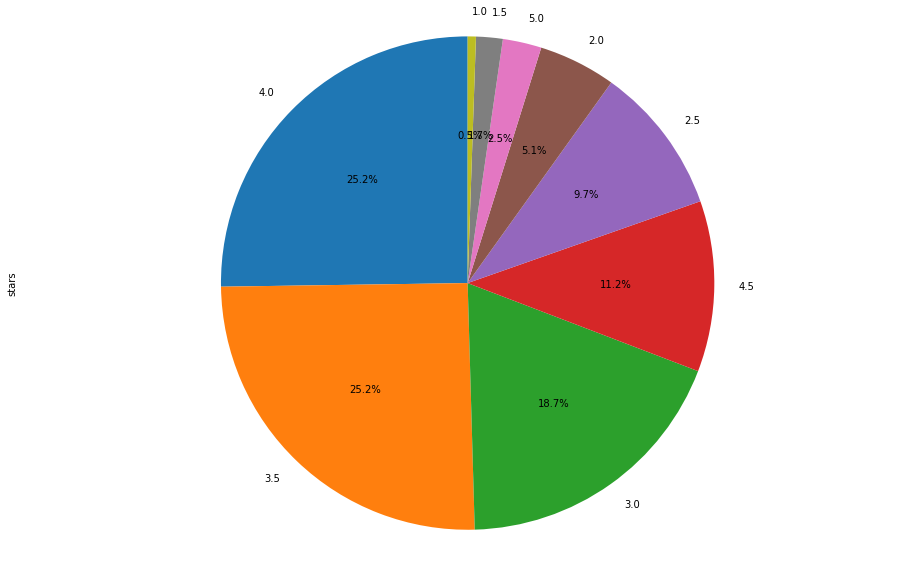

In [28]:
plt.figure(figsize=(16,10))
count_star.plot.pie(y=count_star.index,
           shadow=False,
           startangle=90,
           autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [33]:
rawDataFrame.describe()

,stars
count,47588.000000
mean,3.460788
std,0.769556
min,1.000000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [38]:
count_price = rawDataFrame["RestaurantsPriceRange2"].value_counts()

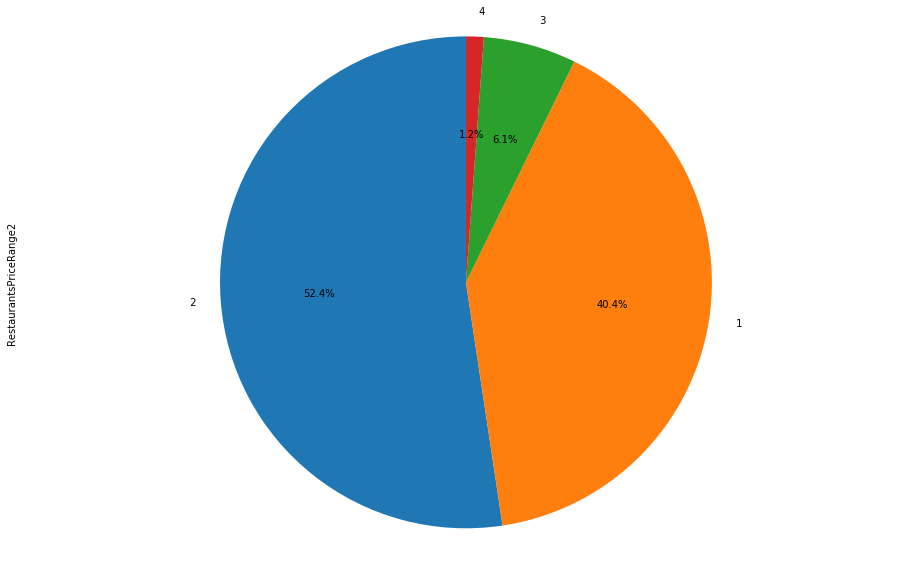

In [39]:
plt.figure(figsize=(16,10))
count_price.plot.pie(y=count_price.index,
           shadow=False,
           startangle=90,
           autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [70]:
i = 0
removeColumn = []
for column in rawDataFrame.columns:
    counts = rawDataFrame[column].isnull().sum()
    if (counts > len(rawDataFrame)/3):
        print("Index: "+ str(i))
        i = i + 1
        print(column + ":")
        print(counts)
        removeColumn.append(column)

Index: 0
AcceptsInsurance:
47581
Index: 1
AgesAllowed:
47529
Index: 2
Ambience divey:
24032
Index: 3
BYOB:
46687
Index: 4
BYOBCorkage:
46192
Index: 5
BestNights:
44072
Index: 6
BusinessAcceptsBitcoin:
45564
Index: 7
ByAppointmentOnly:
47150
Index: 8
Caters:
19099
Index: 9
CoatCheck:
43071
Index: 10
Corkage:
46937
Index: 11
DietaryRestrictions:
47370
Index: 12
DogsAllowed:
41433
Index: 13
DriveThru:
42085
Index: 14
GoodForDancing:
42698
Index: 15
HairSpecializesIn:
47582
Index: 16
HappyHour:
42824
Index: 17
Music:
43118
Index: 18
Open24Hours:
47316
Index: 19
RestaurantsCounterService:
47192
Index: 20
Smoking:
43278
Index: 21
WheelchairAccessible:
27613


In [72]:
removeColumn

['AcceptsInsurance',
 'AgesAllowed',
 'Ambience divey',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BusinessAcceptsBitcoin',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'HairSpecializesIn',
 'HappyHour',
 'Music',
 'Open24Hours',
 'RestaurantsCounterService',
 'Smoking',
 'WheelchairAccessible']

In [73]:
for column in rawDataFrame.columns:
    if column not in removeColumn:
        print(rawDataFrame[column].value_counts(dropna=False))

 none             17112
 full_bar         15167
NaN                9551
 beer_and_wine     5758
Name: Alcohol, dtype: int64
 False    20101
 True     16720
NaN       10767
Name: Ambience casual, dtype: int64
 False    36079
NaN       10767
 True       742
Name: Ambience classy, dtype: int64
 False    36104
NaN       10767
 True       717
Name: Ambience hipster, dtype: int64
 False    36348
NaN       10767
 True       473
Name: Ambience intimate, dtype: int64
 False    36664
NaN       10767
 True       157
Name: Ambience touristy, dtype: int64
 False    35397
NaN       10767
 True      1424
Name: Ambience trendy, dtype: int64
 False    36518
NaN       10767
 True       303
Name: Ambience upscale, dtype: int64
 False    36364
NaN       10767
 True       457
Name: Ambienceromantic, dtype: int64
 True     24465
NaN       15339
 False     7784
Name: BikeParking, dtype: int64
 True     41160
NaN        3935
 False     2493
Name: BusinessAcceptsCreditCards, dtype: int64
 False    23655
 True 